In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import numpy as np

In [ ]:
from utils.utils import load_data

FOLDER_PATH = "projekt2_data"

data_df = load_data(FOLDER_PATH, df_delimiter=",")
data_df.head(10)

,SentenceId,Phrase,Sentiment,df_
0,1,a series of escapades demonstrating the adage ...,1,0
1,1,a series of escapades demonstrating the adage ...,2,0
2,1,a series,2,0
3,1,a,2,0
4,1,series,2,0
5,1,of escapades demonstrating the adage that what...,2,0
6,1,of,2,0
7,1,escapades demonstrating the adage that what is...,2,0
8,1,escapades,2,0
9,1,demonstrating the adage that what is good for ...,2,0


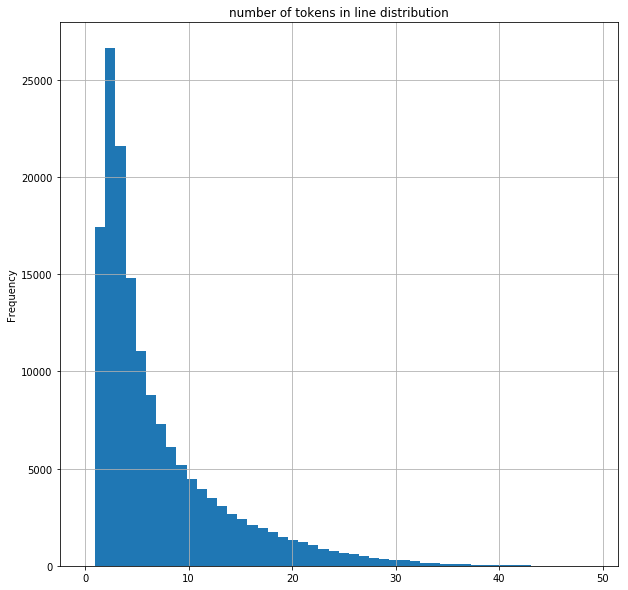

In [ ]:
data_df["Phrase"].str.split().str.len().plot(kind="hist", title="number of tokens in line distribution", grid=True, figsize=(10,10), bins=50);

# ELMO

In [ ]:
from preprocess_data.preprocess_data import preprocess_data_word
from utils.utils_result import save_report, update_fit_params, evaluation

Using TensorFlow backend.


In [ ]:
# preprocess data
(x_train, y_train), (x_val, y_val), (x_test, y_test), data = preprocess_data_word(data_df, x_label="Phrase", y_label="Sentiment", max_len_seq=50)

In [ ]:
# general parameter setting
tensorboard_params = None

fit_params = {
    "x": x_train,
    "y": y_train,
    "epochs": 50,
    "batch_size": 64,
    "validation_data": (x_val, y_val) 
}

input_params = {
    "shape": (1,),
    "dtype": "string"
}

test_result_dict = {}

## Word Level

### RNN

In [ ]:
from architecture.models import model_rnn

W0525 18:27:43.383515 140446093899648 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [ ]:
# parameters setting
elmo_params_rnn = {
    "trainable": False,
    "output_dim": 1024,
    "output_type": "elmo"
}

model_params_elmo_rnn = {
    "input_layer": "simple_input",
    "emb_layer": "Elmo",
    "input_params": input_params,
    "emb_params": elmo_params_rnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_elmo_rnn"
model_elmo_rnn = model_rnn(model_params_elmo_rnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

Instructions for updating:
Colocations handled automatically by placer.


W0525 18:27:52.892484 140446093899648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0525 18:27:53.543773 140446093899648 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0525 18:27:53.605705 140446093899648 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 139999 samples, validate on 7800 samples
Instructions for updating:
Use tf.cast instead.


W0525 18:27:57.916870 140446093899648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


W0525 18:27:58.030869 140446093899648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:102: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Epoch 1/50
139999/139999 [==============================] - 813s 6ms/sample - loss: 0.9712 - acc: 0.5996 - val_loss: 0.9133 - val_acc: 0.6163
Epoch 2/50
139999/139999 [==============================] - 805s 6ms/sample - loss: 0.8699 - acc: 0.6386 - val_loss: 0.8898 - val_acc: 0.6269
Epoch 3/50
139999/139999 [==============================] - 810s 6ms/sample - loss: 0.8337 - acc: 0.6517 - val_loss: 0.8915 - val_acc: 0.6288
Epoch 4/50
139999/139999 [==============================] - 810s 6ms/sample - loss: 0.8091 - acc: 0.6630 - val_loss: 0.8858 - val_acc: 0.6276
Epoch 5/50
139999/139999 [==============================] - 812s 6ms/sample - loss: 0.7910 - acc: 0.6699 - val_loss: 0.8751 - val_acc: 0.6331
Epoch 6/50
139999/139999 [==============================] - 805s 6ms/sample - loss: 0.7777 - acc: 0.6763 - val_loss: 0.8966 - val_acc: 0.6314
Epoch 7/50
139999/139999 [==============================] - 806s 6ms/sample - loss: 0.7675 - acc: 0.6801 - val_loss: 0.8901 - val_acc: 0.6354
Epoch 

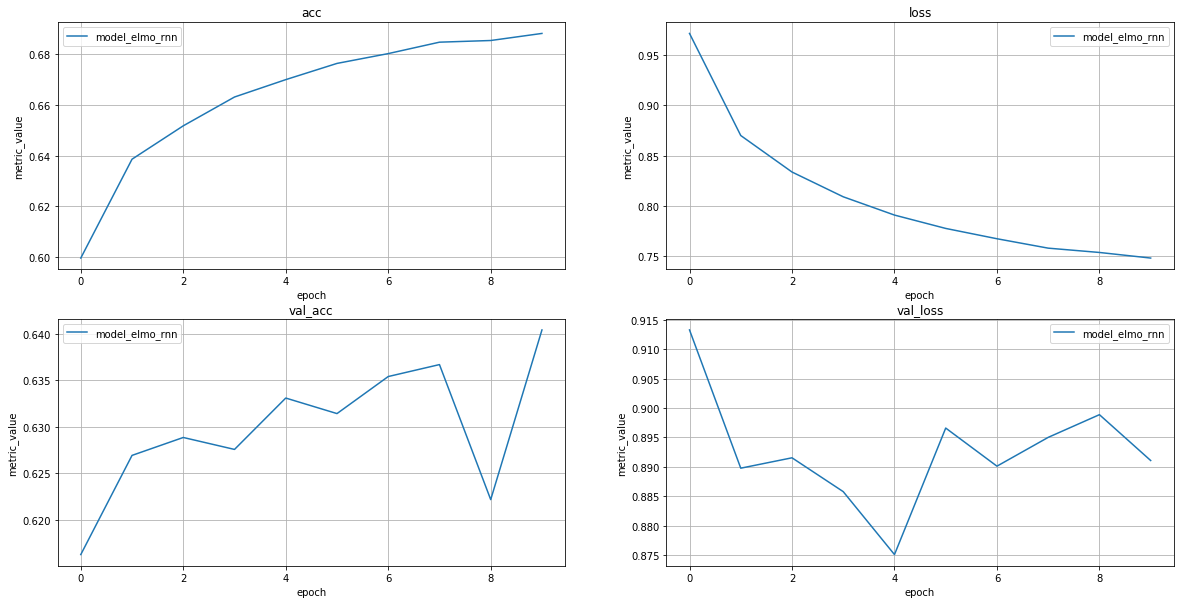

In [ ]:
# training
model_elmo_rnn.fit(**fit_params);
model_elmo_rnn = save_report(model_elmo_rnn, model_name=model_name, markered_path=markered_path)

In [ ]:
# evaluation
test_result_dict = evaluation(model=model_elmo_rnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_elmo_rnn, to 0.6297


### CNN

In [ ]:
from architecture.models import model_cnn

In [ ]:
# parameters setting
elmo_params_cnn = {
    "trainable": False,
    "output_dim": 1024,
    "output_type": "elmo"
}

model_params_elmo_cnn = {
    "input_layer": "simple_input",
    "emb_layer": "Elmo",
    "input_params": input_params,
    "emb_params": elmo_params_cnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_elmo_cnn"
model_elmo_cnn = model_cnn(model_params_elmo_cnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0525 20:46:03.772798 140446093899648 saver.py:1483] Saver not created because there are no variables in the graph to restore


Train on 139999 samples, validate on 7800 samples
Epoch 1/50
139999/139999 [==============================] - 476s 3ms/sample - loss: 0.9526 - acc: 0.6100 - val_loss: 0.9224 - val_acc: 0.6095
Epoch 2/50
139999/139999 [==============================] - 470s 3ms/sample - loss: 0.8558 - acc: 0.6467 - val_loss: 0.9065 - val_acc: 0.6215
Epoch 3/50
139999/139999 [==============================] - 470s 3ms/sample - loss: 0.8145 - acc: 0.6614 - val_loss: 0.9011 - val_acc: 0.6253
Epoch 4/50
139999/139999 [==============================] - 474s 3ms/sample - loss: 0.7823 - acc: 0.6740 - val_loss: 0.8944 - val_acc: 0.6264
Epoch 5/50
139999/139999 [==============================] - 475s 3ms/sample - loss: 0.7597 - acc: 0.6822 - val_loss: 0.9164 - val_acc: 0.6232
Epoch 6/50
139999/139999 [==============================] - 476s 3ms/sample - loss: 0.7379 - acc: 0.6896 - val_loss: 0.9202 - val_acc: 0.6276
Epoch 7/50
139999/139999 [==============================] - 481s 3ms/sample - loss: 0.7209 - acc: 

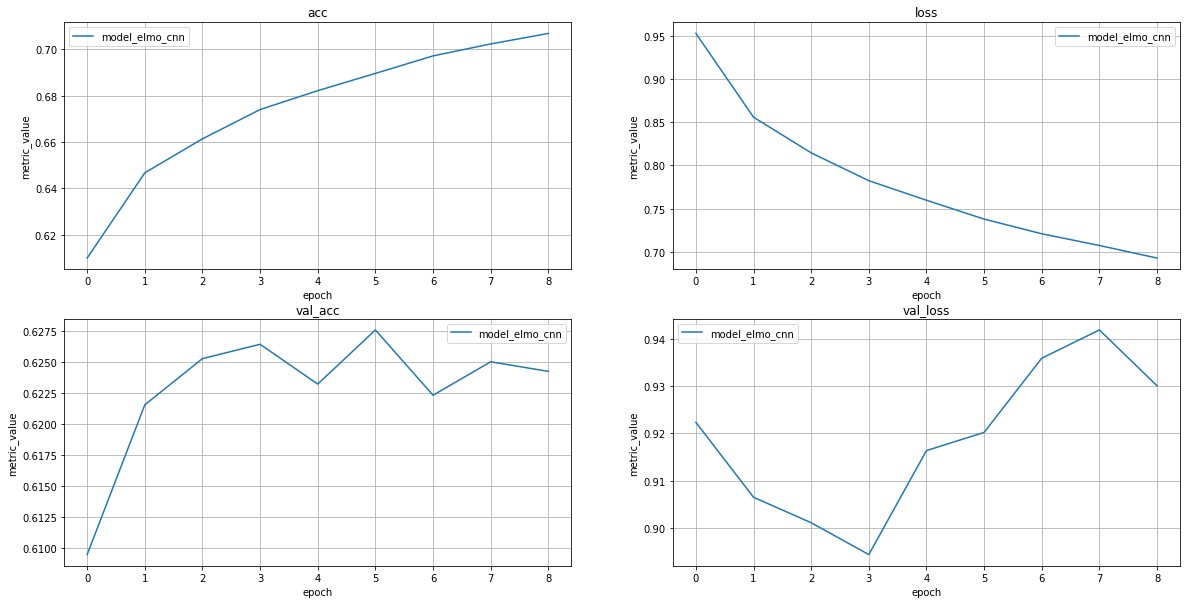

In [ ]:
# training
model_elmo_cnn.fit(**fit_params);
model_elmo_cnn = save_report(model=model_elmo_cnn, model_name=model_name, markered_path=markered_path)

In [ ]:
# evaluation
test_result_dict = evaluation(model=model_elmo_cnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_elmo_cnn, to 0.6249


## Phrase Level FFNN

In [ ]:
from architecture.models import model_ffnn

In [ ]:
# parameters setting
elmo_params_ffnn = {
    "trainable": False,
    "output_dim": 1024,
    "output_type": "default"
}

params_elmo_raw = {
    "input_layer": "simple_input",
    "emb_layer": "Elmo",
    "input_params": input_params,
    "emb_params": elmo_params_ffnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_elmo_ffnn"
model_elmo_ffnn = model_ffnn(params_elmo_raw)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0525 21:58:00.343225 140446093899648 saver.py:1483] Saver not created because there are no variables in the graph to restore


Train on 139999 samples, validate on 7800 samples
Epoch 1/50
139999/139999 [==============================] - 464s 3ms/sample - loss: 0.9912 - acc: 0.5946 - val_loss: 0.9920 - val_acc: 0.5910
Epoch 2/50
139999/139999 [==============================] - 462s 3ms/sample - loss: 0.9280 - acc: 0.6148 - val_loss: 0.9816 - val_acc: 0.5967
Epoch 3/50
139999/139999 [==============================] - 460s 3ms/sample - loss: 0.9081 - acc: 0.6232 - val_loss: 0.9560 - val_acc: 0.6059
Epoch 4/50
139999/139999 [==============================] - 461s 3ms/sample - loss: 0.8947 - acc: 0.6292 - val_loss: 0.9522 - val_acc: 0.6009
Epoch 5/50
139999/139999 [==============================] - 461s 3ms/sample - loss: 0.8869 - acc: 0.6318 - val_loss: 0.9485 - val_acc: 0.6035
Epoch 6/50
139999/139999 [==============================] - 458s 3ms/sample - loss: 0.8774 - acc: 0.6354 - val_loss: 0.9498 - val_acc: 0.5999
Epoch 7/50
139999/139999 [==============================] - 461s 3ms/sample - loss: 0.8682 - acc: 

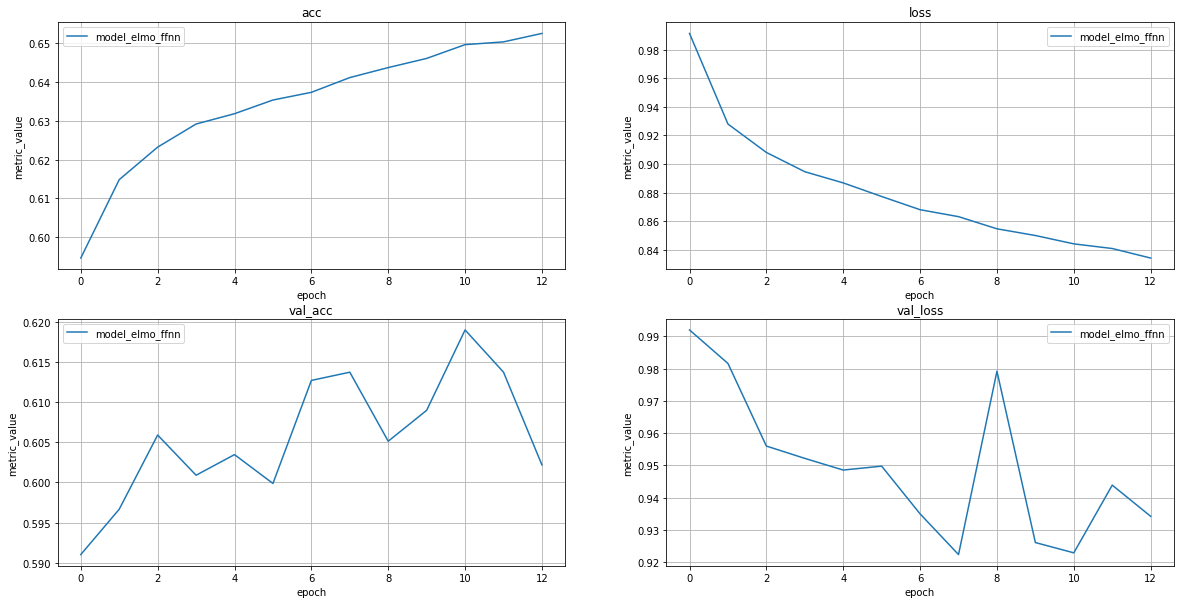

In [ ]:
# training
model_elmo_ffnn.fit(**fit_params);
model_elmo_ffnn = save_report(model=model_elmo_ffnn, model_name=model_name, markered_path=markered_path)

In [ ]:
# evaluation
test_result_dict = evaluation(model=model_elmo_ffnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_elmo_ffnn, to 0.6185


# Results

In [ ]:
test_result_dict

{'model_elmo_cnn': 0.6248717948717949,
 'model_elmo_ffnn': 0.6184615384615385,
 'model_elmo_rnn': 0.6297435897435898}

In [ ]:
from utils.utils_result import update_common_history_folder, display_results

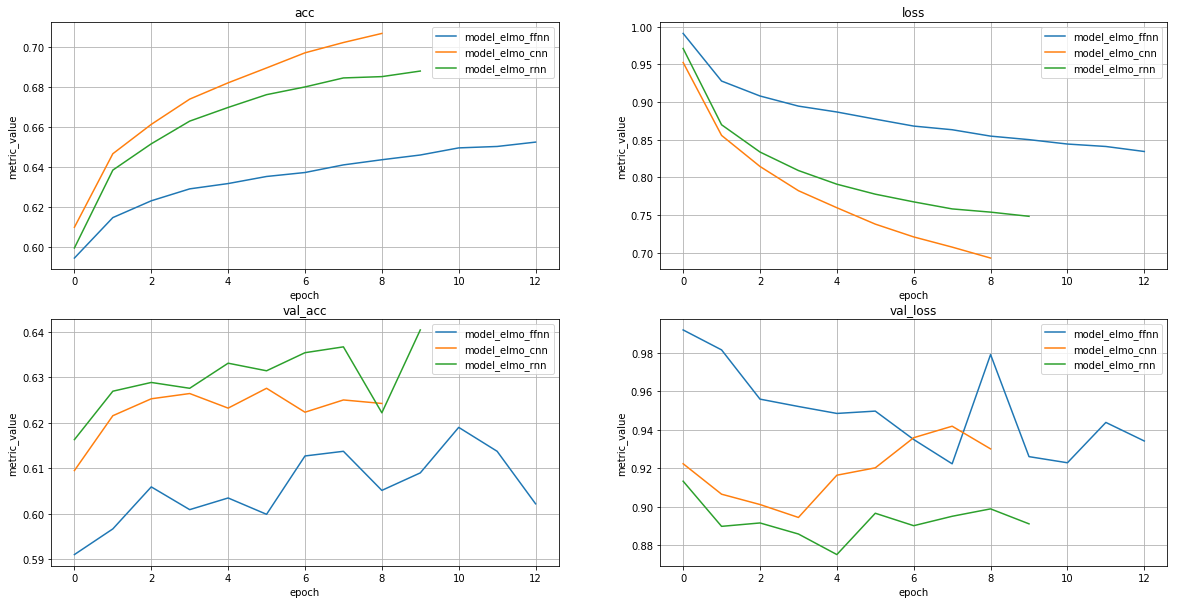

In [ ]:
update_common_history_folder("about_model")
display_results("about_models/comparision")